In [1]:
#Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [3]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [4]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [5]:
#Create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size =1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [6]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [7]:
from citipy import citipy

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

594

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | chatra
Processing Record 2 of Set 1 | korla
Processing Record 3 of Set 1 | geraldton
Processing Record 4 of Set 1 | urdzhar
City not found. Skipping...
Processing Record 5 of Set 1 | nanortalik
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | baft
Processing Record 8 of Set 1 | bethel
Processing Record 9 of Set 1 | nome
Processing Record 10 of Set 1 | ancud
Processing Record 11 of Set 1 | sinnamary
Processing Record 12 of Set 1 | qaanaaq
Processing Record 13 of Set 1 | castro
Processing Record 14 of Set 1 | tura
Processing Record 15 of Set 1 | vilyuysk
Processing Record 16 of Set 1 | arraial do cabo
Processing Record 17 of Set 1 | nemuro
Processing Record 18 of Set 1 | rikitea
Processing Record 19 of Set 1 | tacuarembo
Processing Record 20 of Set 1 | cabo san lucas
Processing Record 21 of Set 1 | yar-sale
Processing Record 22 of Set 1 | taolanaro
City not found. Skipping...
P

Processing Record 38 of Set 4 | tamiahua
Processing Record 39 of Set 4 | bonavista
Processing Record 40 of Set 4 | aguimes
Processing Record 41 of Set 4 | hilo
Processing Record 42 of Set 4 | norman wells
Processing Record 43 of Set 4 | pallasovka
Processing Record 44 of Set 4 | new norfolk
Processing Record 45 of Set 4 | betera
Processing Record 46 of Set 4 | kununurra
Processing Record 47 of Set 4 | atambua
Processing Record 48 of Set 4 | goderich
Processing Record 49 of Set 4 | thompson
Processing Record 50 of Set 4 | pemangkat
Processing Record 1 of Set 5 | aquiraz
Processing Record 2 of Set 5 | sistranda
Processing Record 3 of Set 5 | guerrero negro
Processing Record 4 of Set 5 | yerbogachen
Processing Record 5 of Set 5 | neiafu
Processing Record 6 of Set 5 | nouadhibou
Processing Record 7 of Set 5 | touros
Processing Record 8 of Set 5 | dwarka
Processing Record 9 of Set 5 | hasaki
Processing Record 10 of Set 5 | alyangula
Processing Record 11 of Set 5 | shetpe
Processing Record 1

Processing Record 32 of Set 8 | jalu
Processing Record 33 of Set 8 | sawakin
Processing Record 34 of Set 8 | soma
Processing Record 35 of Set 8 | prata
Processing Record 36 of Set 8 | matara
Processing Record 37 of Set 8 | poum
Processing Record 38 of Set 8 | udachnyy
Processing Record 39 of Set 8 | inuvik
Processing Record 40 of Set 8 | grand river south east
City not found. Skipping...
Processing Record 41 of Set 8 | cervo
Processing Record 42 of Set 8 | rognan
Processing Record 43 of Set 8 | burgeo
Processing Record 44 of Set 8 | cullman
Processing Record 45 of Set 8 | alta floresta
Processing Record 46 of Set 8 | kolosovka
Processing Record 47 of Set 8 | kilindoni
Processing Record 48 of Set 8 | roald
Processing Record 49 of Set 8 | oranjemund
Processing Record 50 of Set 8 | crab hill
City not found. Skipping...
Processing Record 1 of Set 9 | hunza
City not found. Skipping...
Processing Record 2 of Set 9 | vanimo
Processing Record 3 of Set 9 | godfrey
Processing Record 4 of Set 9 |

Processing Record 18 of Set 12 | palabuhanratu
City not found. Skipping...
Processing Record 19 of Set 12 | shingu
Processing Record 20 of Set 12 | pangody
Processing Record 21 of Set 12 | plaiesii-de-jos
City not found. Skipping...
Processing Record 22 of Set 12 | urucui
Processing Record 23 of Set 12 | kaka
Processing Record 24 of Set 12 | manado
Processing Record 25 of Set 12 | bentiu
Processing Record 26 of Set 12 | ondjiva
Processing Record 27 of Set 12 | altagracia de orituco
Processing Record 28 of Set 12 | vreed en hoop
City not found. Skipping...
Processing Record 29 of Set 12 | inhambane
Processing Record 30 of Set 12 | ikwiriri
Processing Record 31 of Set 12 | monrovia
Processing Record 32 of Set 12 | maple creek
Processing Record 33 of Set 12 | rawah
Processing Record 34 of Set 12 | luau
Processing Record 35 of Set 12 | walvis bay
Processing Record 36 of Set 12 | puerto leguizamo
Processing Record 37 of Set 12 | houma
Processing Record 38 of Set 12 | port blair
Processing R

In [10]:
len(city_data)

549

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Chatra,24.2167,84.8667,78.78,88,100,4.63,IN,2021-07-27 00:47:50
1,Korla,41.7597,86.1469,86.52,22,0,10.54,CN,2021-07-27 00:47:51
2,Geraldton,-28.7667,114.6000,64.81,63,40,24.16,AU,2021-07-27 00:47:51
3,Nanortalik,60.1432,-45.2371,47.62,82,48,10.85,GL,2021-07-27 00:46:00
4,Ushuaia,-54.8000,-68.3000,33.46,93,90,6.91,AR,2021-07-27 00:44:18
5,Baft,29.2340,56.6057,70.41,24,88,9.08,IR,2021-07-27 00:47:52
6,Bethel,41.3712,-73.4140,79.75,80,75,4.61,US,2021-07-27 00:47:52
7,Nome,64.5011,-165.4064,50.07,87,90,10.36,US,2021-07-27 00:47:53
8,Ancud,-41.8697,-73.8203,42.33,79,14,6.08,CL,2021-07-27 00:43:11
9,Sinnamary,5.3833,-52.9500,78.17,85,70,6.69,GF,2021-07-27 00:47:53


In [12]:
new_column_order_city_data = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order_city_data]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Chatra,IN,2021-07-27 00:47:50,24.2167,84.8667,78.78,88,100,4.63
1,Korla,CN,2021-07-27 00:47:51,41.7597,86.1469,86.52,22,0,10.54
2,Geraldton,AU,2021-07-27 00:47:51,-28.7667,114.6000,64.81,63,40,24.16
3,Nanortalik,GL,2021-07-27 00:46:00,60.1432,-45.2371,47.62,82,48,10.85
4,Ushuaia,AR,2021-07-27 00:44:18,-54.8000,-68.3000,33.46,93,90,6.91
...,...,...,...,...,...,...,...,...,...
544,Comodoro Rivadavia,AR,2021-07-27 00:51:30,-45.8667,-67.5000,46.26,57,0,12.66
545,Necochea,AR,2021-07-27 00:51:31,-38.5473,-58.7368,40.03,71,86,20.56
546,Plettenberg Bay,ZA,2021-07-27 00:51:31,-34.0527,23.3716,69.22,32,99,20.60
547,Ilulissat,GL,2021-07-27 00:51:31,69.2167,-51.1000,46.51,91,100,9.80


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

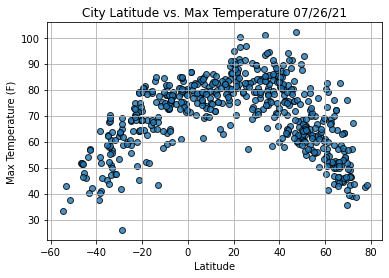

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

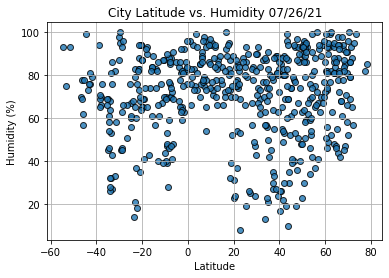

In [16]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

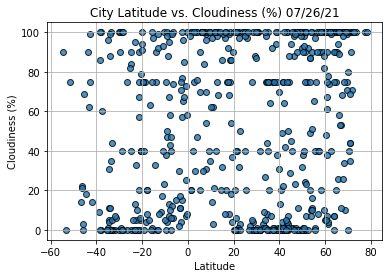

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

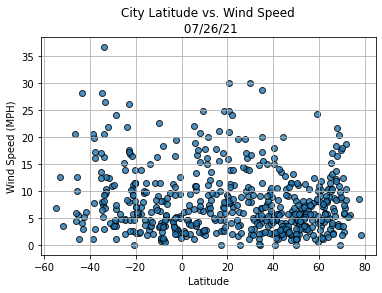

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed\n "+ time.strftime("%x"))
plt.ylabel("Wind Speed (MPH)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [19]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [20]:
index13 = city_data_df.loc[13]
index13

City                     Vilyuysk
Country                        RU
Date          2021-07-27 00:47:55
Lat                       63.7553
Lng                      121.6247
Max Temp                    75.94
Humidity                       48
Cloudiness                      7
Wind Speed                   8.25
Name: 13, dtype: object

In [21]:
city_data_df["Lat"] >=0

0       True
1       True
2      False
3       True
4      False
       ...  
544    False
545    False
546    False
547     True
548     True
Name: Lat, Length: 549, dtype: bool

In [22]:
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

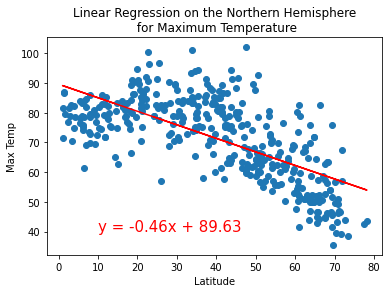

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\n for Maximum Temperature', 'Max Temp',(10,40))

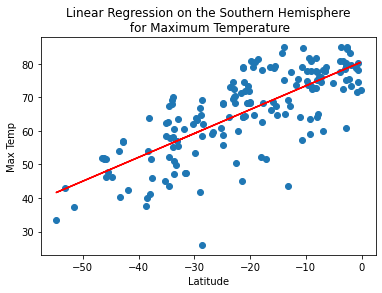

In [24]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\n for Maximum Temperature', 'Max Temp',(-50, 90))

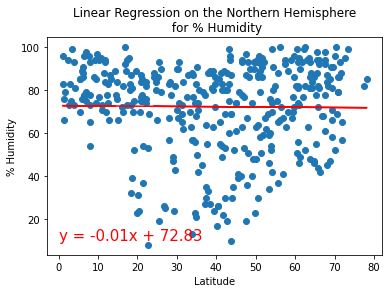

In [25]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\n for % Humidity', '% Humidity',(0, 10))

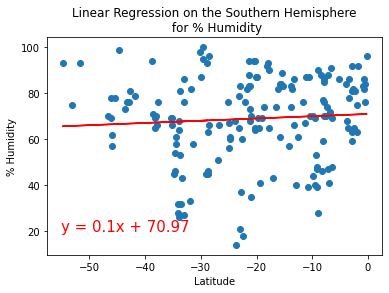

In [26]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\n for % Humidity', '% Humidity',(-55, 20))

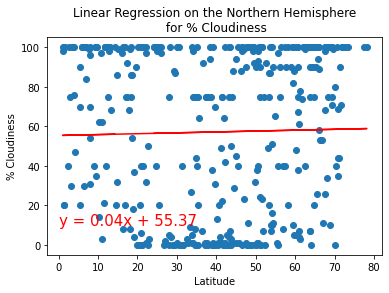

In [27]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\n for % Cloudiness', '% Cloudiness',(0, 10))

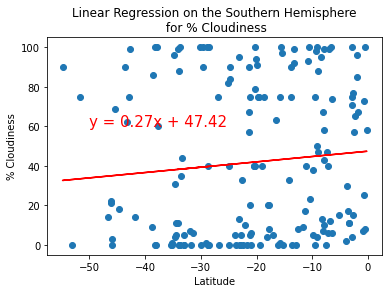

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\n for % Cloudiness', '% Cloudiness',(-50,60))

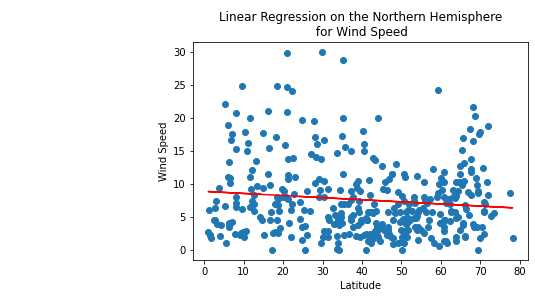

In [43]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\n for Wind Speed', 'Wind Speed',(-50,35))

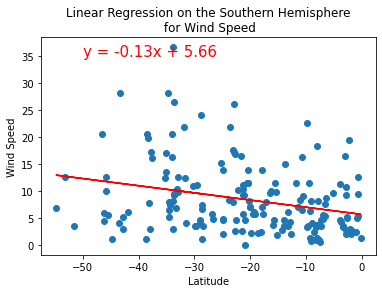

In [44]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\n for Wind Speed', 'Wind Speed',(-50,35))